<a href="https://colab.research.google.com/github/rushikesh1662002/Dataset/blob/main/College_Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/rushikesh1662002/Dataset/main/Admission.csv')

In [ ]:
df.head()

,Course_Code,Year,Gender,Category,Merit_No,Seat_Types,Round,CET_Score,Chance_Of_Admit
0,411624210,2019-20,Male,OPEN,19801,Home University,Round 1,90.11,1
1,411624210,2019-20,Female,OPEN,18546,Home University,Round 1,90.85,1
2,411624210,2019-20,Male,TFWS,13269,Home University,Round 1,90.85,1
3,411624210,2019-20,Female,TFWS,13269,Home University,Round 1,90.85,1
4,411624210,2019-20,Male,OPEN,20831,State Level,Round 2,89.50,1


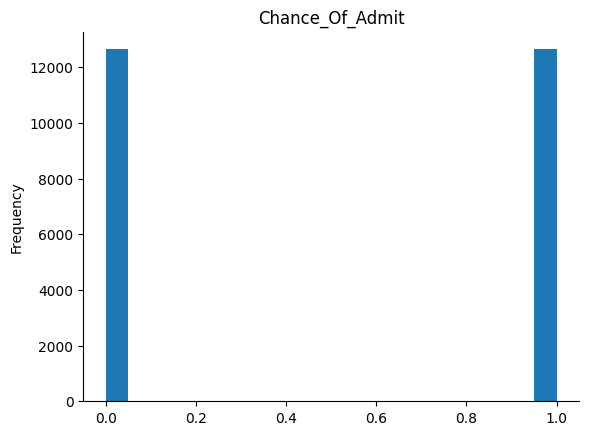

In [ ]:
from matplotlib import pyplot as plt
df['Chance_Of_Admit'].plot(kind='hist', bins=20, title='Chance_Of_Admit')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['Category'].value_counts()


OPEN           5276
OBC            4180
SC             3418
TFWS           2605
NT             2402
EWS            2332
ST             2170
VJ             1466
PWD            1412
NT                8
VJ                6
OBC               4
sc                2
Name: Category, dtype: int64

In [ ]:
df = df.drop(df.loc[df['Category'] == 'PWD'].index)
df = df.drop(df.loc[df['Category'] == 'sc'].index)

df.head()


,Course_Code,Year,Gender,Category,Merit_No,Seat_Types,Round,CET_Score,Chance_Of_Admit
0,411624210,2019-20,Male,OPEN,19801,Home University,Round 1,90.11,1
1,411624210,2019-20,Female,OPEN,18546,Home University,Round 1,90.85,1
2,411624210,2019-20,Male,TFWS,13269,Home University,Round 1,90.85,1
3,411624210,2019-20,Female,TFWS,13269,Home University,Round 1,90.85,1
4,411624210,2019-20,Male,OPEN,20831,State Level,Round 2,89.50,1


In [ ]:
df['Category'].value_counts()

OPEN           5276
OBC            4180
SC             3418
TFWS           2605
NT             2402
EWS            2332
ST             2170
VJ             1466
NT                8
VJ                6
OBC               4
Name: Category, dtype: int64

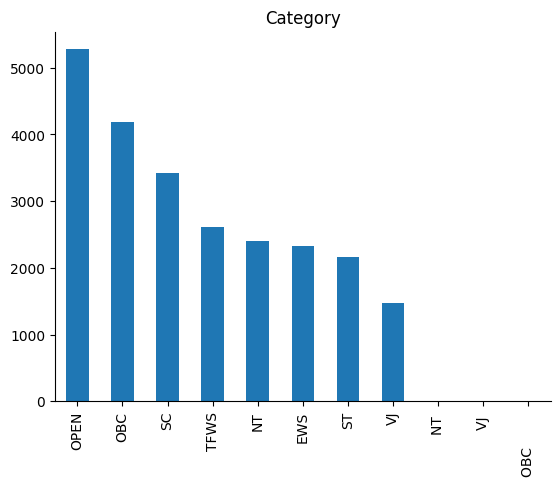

In [ ]:
import matplotlib.pyplot as plt
df['Category'].value_counts().plot(kind='bar', title='Category')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
  df[column] = le.fit_transform(df[column])


In [ ]:
df.head()

,Course_Code,Year,Gender,Category,Merit_No,Seat_Types,Round,CET_Score,Chance_Of_Admit
0,411624210,0,2,5,19801,0,0,90.11,1
1,411624210,0,0,5,18546,0,0,90.85,1
2,411624210,0,2,8,13269,0,0,90.85,1
3,411624210,0,0,8,13269,0,0,90.85,1
4,411624210,0,3,5,20831,5,1,89.50,1


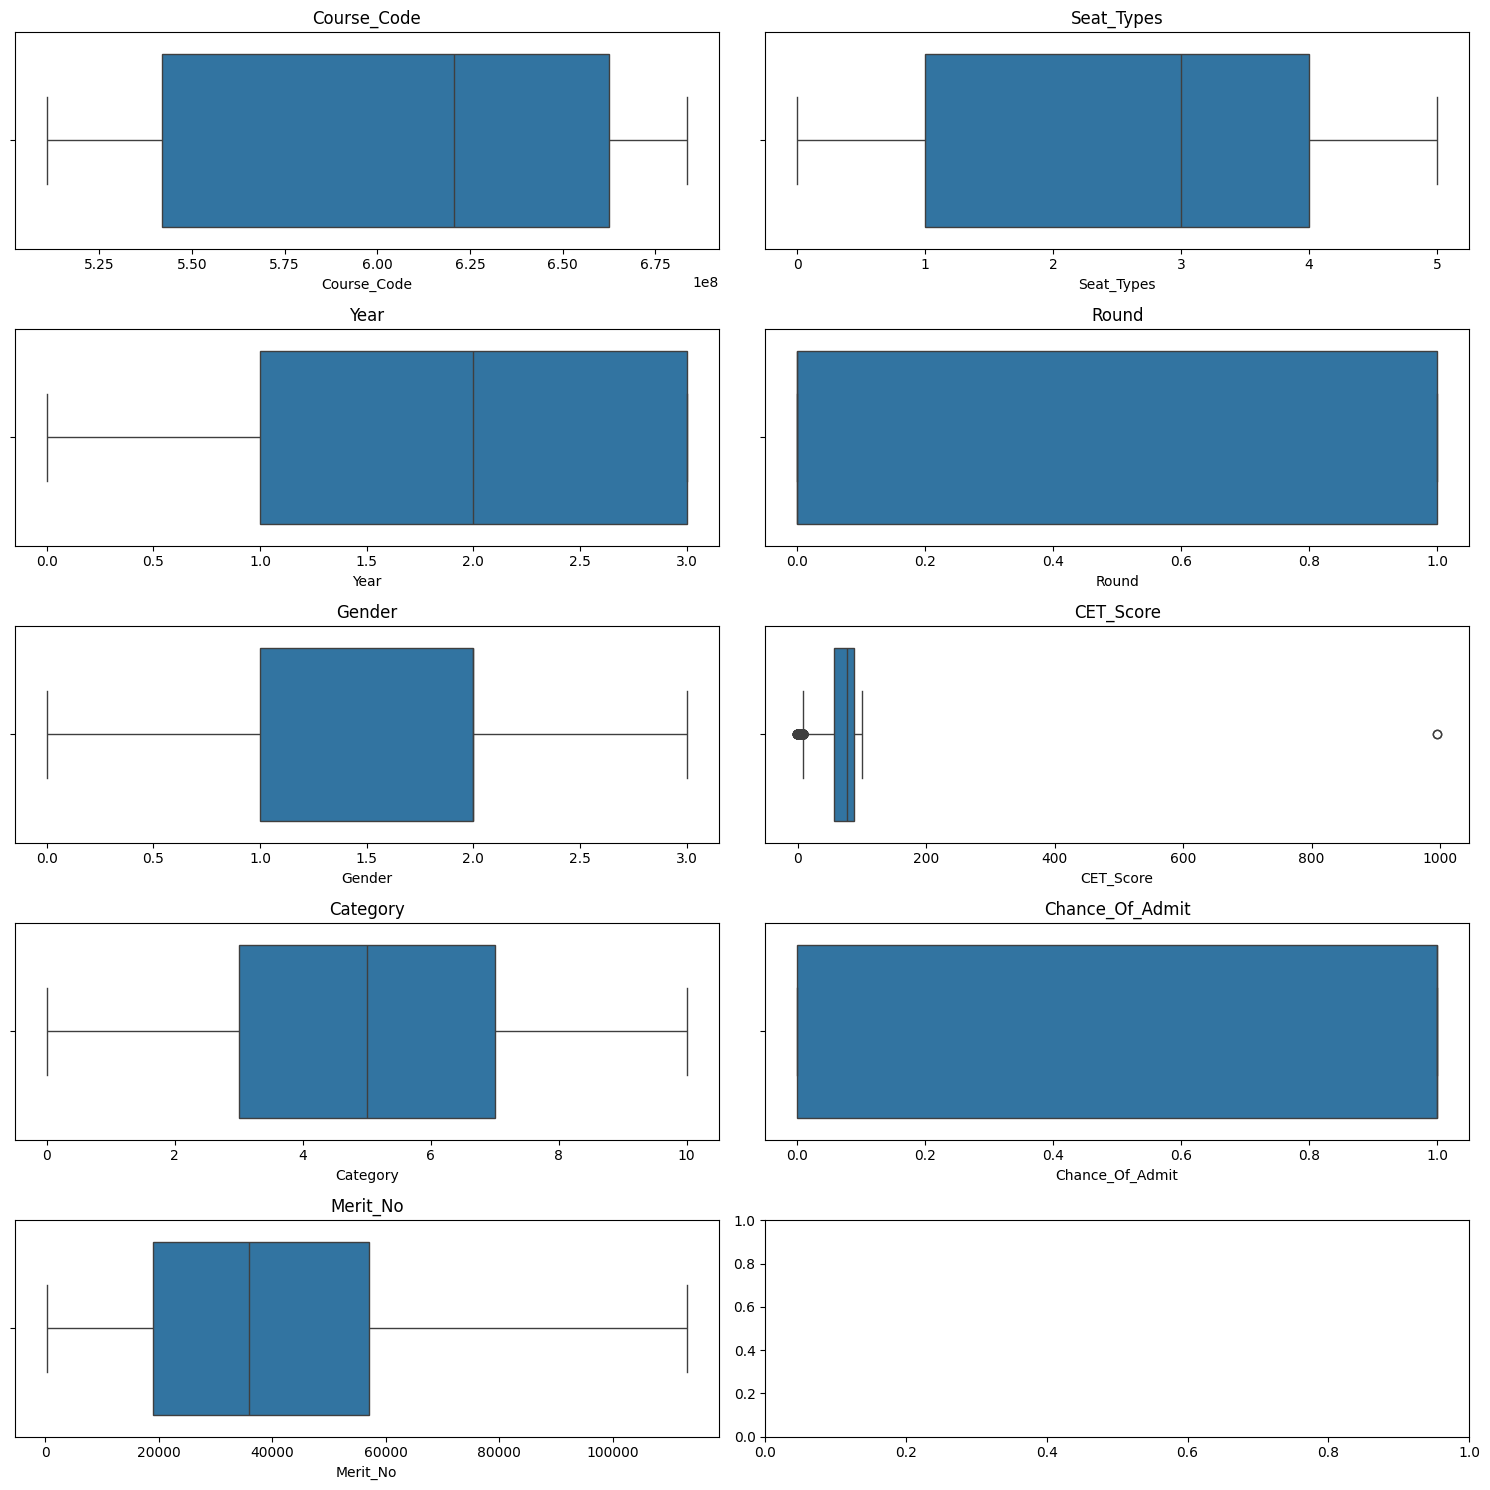

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Find outliers using z-score
z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3).any(axis=1)

# Remove outliers
df_clean = df[~outliers]

# Display boxplots for all columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
for i, col in enumerate(df_clean):
  sns.boxplot(x=df_clean[col], ax=axes[i % 5, i // 5])
  axes[i % 5, i // 5].set_title(col)

plt.tight_layout()
plt.show()


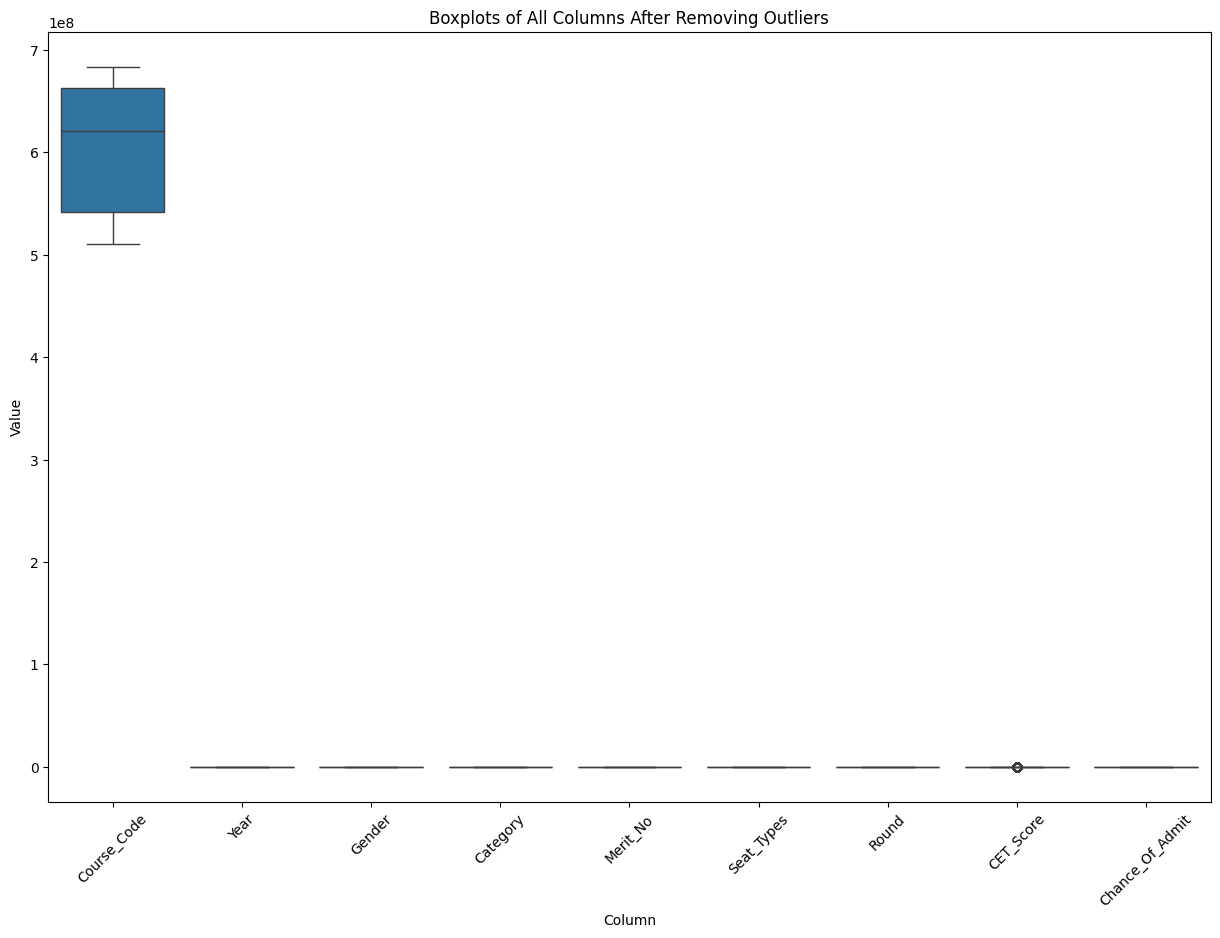

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the data without outliers
sns.boxplot(data=df_clean, ax=ax)

# Add title and labels
ax.set_title('Boxplots of All Columns After Removing Outliers')
ax.set_xlabel('Column')
ax.set_ylabel('Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features and target
X = df_clean.drop('Chance_Of_Admit', axis=1)
y = df_clean['Chance_Of_Admit']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)


Accuracy: 0.49535864978902955
Confusion Matrix:
 [[   0 2990]
 [   0 2935]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2990
           1       0.50      1.00      0.66      2935

    accuracy                           0.50      5925
   macro avg       0.25      0.50      0.33      5925
weighted avg       0.25      0.50      0.33      5925



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Feature extraction
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.49535864978902955


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create the grid search object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Create a new LogisticRegression object with the best hyperparameters
model = LogisticRegression(**best_params)

# Fit the new model to the data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.4919831223628692


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Create a random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a voting classifier with the logistic regression and random forest models
voting_classifier = VotingClassifier(estimators=[('lr', model), ('rf', random_forest)], voting='hard')

# Fit the voting classifier to the data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.430042194092827
